In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

In [51]:
df = pd.read_csv("data_banknote_authentication.txt")
df.columns = ["Variance", "Skewness", "Kurtosis", "Entropy", "Class"]

In [52]:
df

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [53]:
df.Class.values

array([0, 0, 0, ..., 1, 1, 1])

In [76]:
# preprocessing to get our labels
y = df.Class.values
y = np.where(y == 0, -1, 1)

X = df[["Variance", "Skewness"]].values

# deleting instances where where we don't have both bill measurements
deleted_instances = []
for row in range(X.shape[0]):
    if np.isnan(np.sum(X[row, :])):
        deleted_instances.append(row)

X = np.delete(X, deleted_instances, axis = 0) # removing desired instances
y = np.delete(y, deleted_instances) # deleting the label associated with the removed instances 

In [77]:
class Perceptron():
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1]) # creating a random weight vector for neuron initialization
        
        self.errors_ = [] # a list that will contain the misclassification errors we obtain while training
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi # updating the weights
                self.w_[-1] -= update # updating the bias
                errors += int(update != 0)
            self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1] # the weighted sum/input signal
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        
        

In [81]:
percep = Perceptron(epochs = 100)
percep.train(X, y)

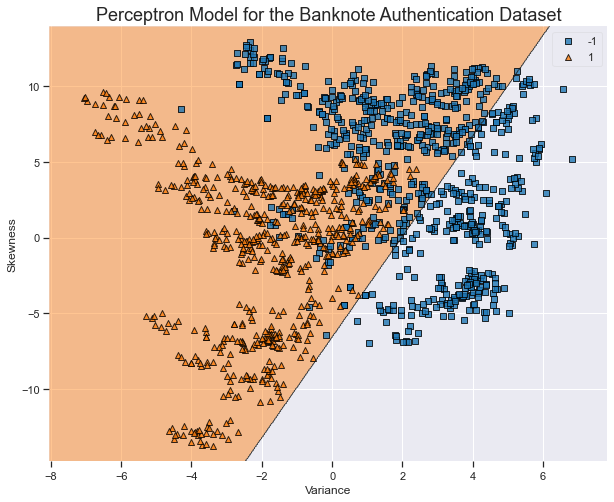

In [82]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("Perceptron Model for the Banknote Authentication Dataset", fontsize = 18)
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.show()

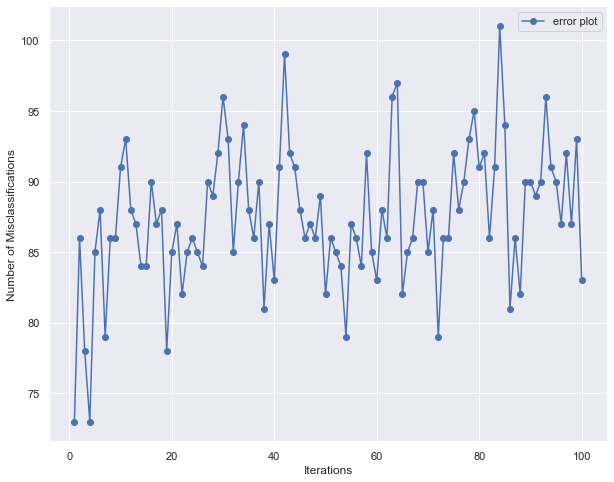

In [83]:
plt.figure(figsize = (10, 8))
plt.xlabel("Iterations")
plt.ylabel("Number of Misclassifications")
plt.plot(range(1, len(percep.errors_) + 1), percep.errors_, marker = "o", label = "error plot")
plt.legend()
plt.show()